In [41]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# training_data = datasets.FashionMNIST(
#     root="/home/jiyong/HDD2/torchdata",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

100.0%


Extracting /home/jiyong/HDD2/torchdata/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/jiyong/HDD2/torchdata/FashionMNIST/raw



100.0%


Extracting /home/jiyong/HDD2/torchdata/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/jiyong/HDD2/torchdata/FashionMNIST/raw



100.0%


Extracting /home/jiyong/HDD2/torchdata/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/jiyong/HDD2/torchdata/FashionMNIST/raw



100.0%

Extracting /home/jiyong/HDD2/torchdata/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/jiyong/HDD2/torchdata/FashionMNIST/raw



In [ ]:
# test_data = datasets.FashionMNIST(
#     root="/home/jiyong/HDD2/torchdata",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )

In [19]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [20]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [28]:
training_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [26]:
test_data.raw_folder

'/home/jiyong/HDD2/torchdata/FashionMNIST/raw'

In [29]:
torch.cuda.is_available()

True

In [30]:
torch.cuda.device_count()

2

In [32]:
for i in (0, 1):
    print(torch.cuda.get_device_name(i))
    

NVIDIA RTX A5000
NVIDIA RTX A5000


In [33]:
cuda0 = torch.device("cuda:0")
cuda1 = torch.device("cuda:1")

In [36]:
a=torch.tensor([[1,2,3,4], [5,6,7,8]])
print("a.divice = ", a.device)
b = a.to(cuda0)
c = a.to(cuda1)
print("b.divice = ", b.device)
print("c.divice = ", c.device)
b

a.divice =  cpu
b.divice =  cuda:0
c.divice =  cuda:1


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]], device='cuda:0')

In [37]:
d=torch.tensor([[1,2], [3,4]], device="cuda:0")

In [39]:
print(d.device)

cuda:0


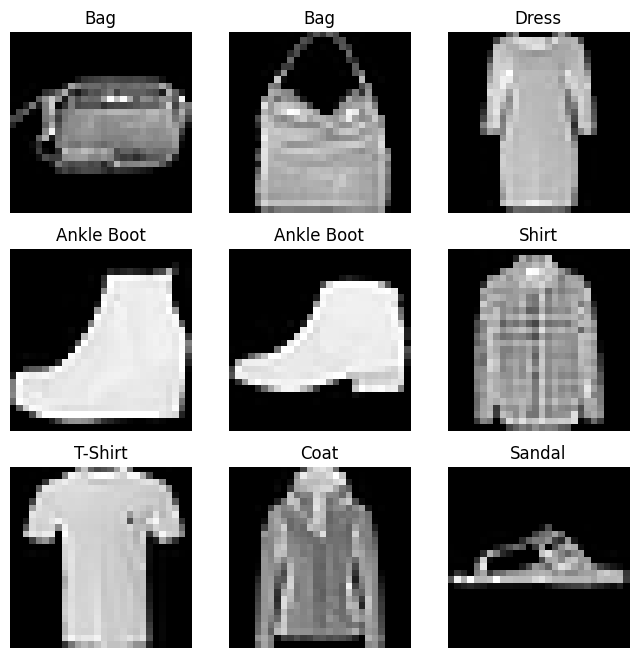

In [42]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [47]:
from torch.utils.data import Dataset

class SimpleCustomDataset(Dataset):
    def __init__(self, data:str):
        self.data = data
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [57]:
ds = SimpleCustomDataset("abcdefghijk")
dloader = DataLoader(ds, batch_size=3, shuffle=True)

In [61]:
for i in range(4):
    print(next(iter(dloader)))


['d', 'i', 'g']
['f', 'd', 'c']
['e', 'h', 'c']
['h', 'c', 'a']


In [63]:
np.array([1,2,3])

array([1, 2, 3])